### Import dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow


### Data Acquisition and Inspection

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# inspect data
print(df.shape)
print(df.columns)
print(df.dtypes)

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### Data Exploration

In [9]:
# run descriptive statistics
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


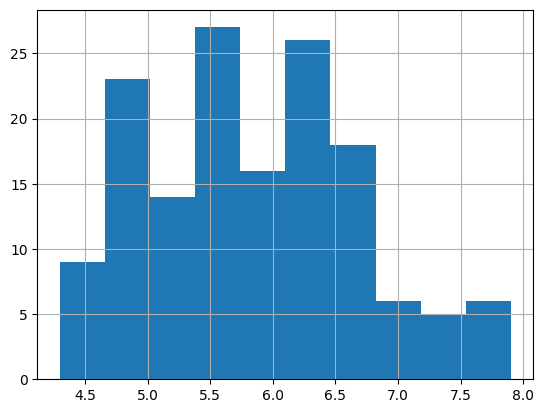

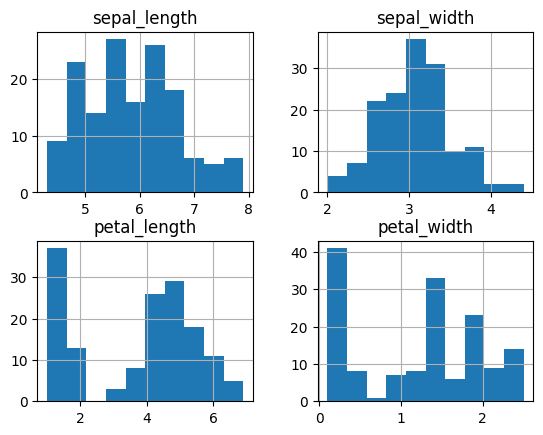

In [10]:
# create histogram based off a numerical column
df['sepal_length'].hist()
# create histogram based off all numerical columns
df.hist()

# show plots
plt.show()

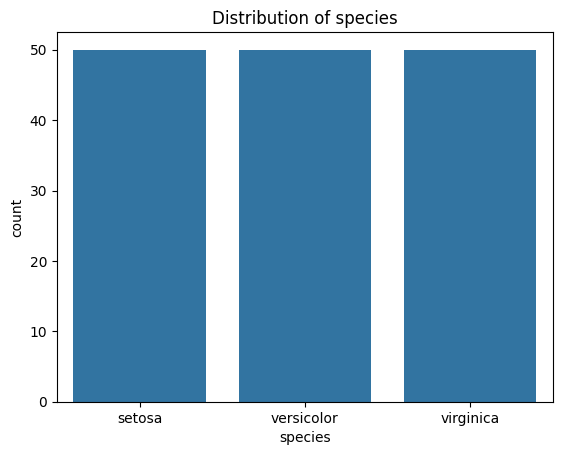

In [14]:
# Inspect value counts by species
df['species'].value_counts()

# Now do value counts by all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

0    6.5
1    6.3
2    6.0
3    6.1
4    6.4
Name: total_length, dtype: float64

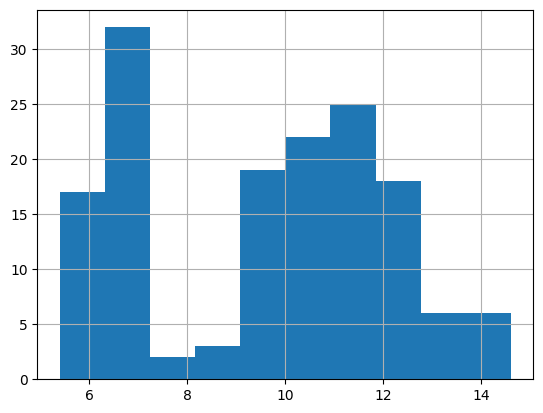

In [22]:
# Now let's do a little transformation and feature engineering. 
# Let's create a new column that is the sum of the sepal and petal lengths
# Make a histogram of the results
df['total_length'] = df['sepal_length'] + df['petal_length']
df['total_length'].hist()
df['total_length'].head()

0    3.7
1    3.2
2    3.4
3    3.3
4    3.8
Name: total_width, dtype: float64

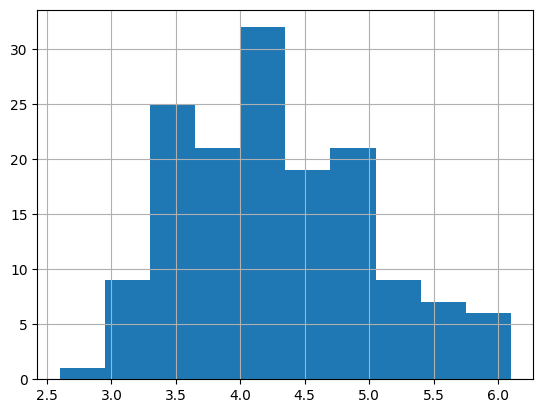

In [23]:
# do the same thing but with width
df['total_width'] = df['sepal_width'] + df['petal_width']
df['total_width'].hist()
df['total_width'].head()

### Create Charts
Create a series of charts using the dataframe, matplotlib and seaborn

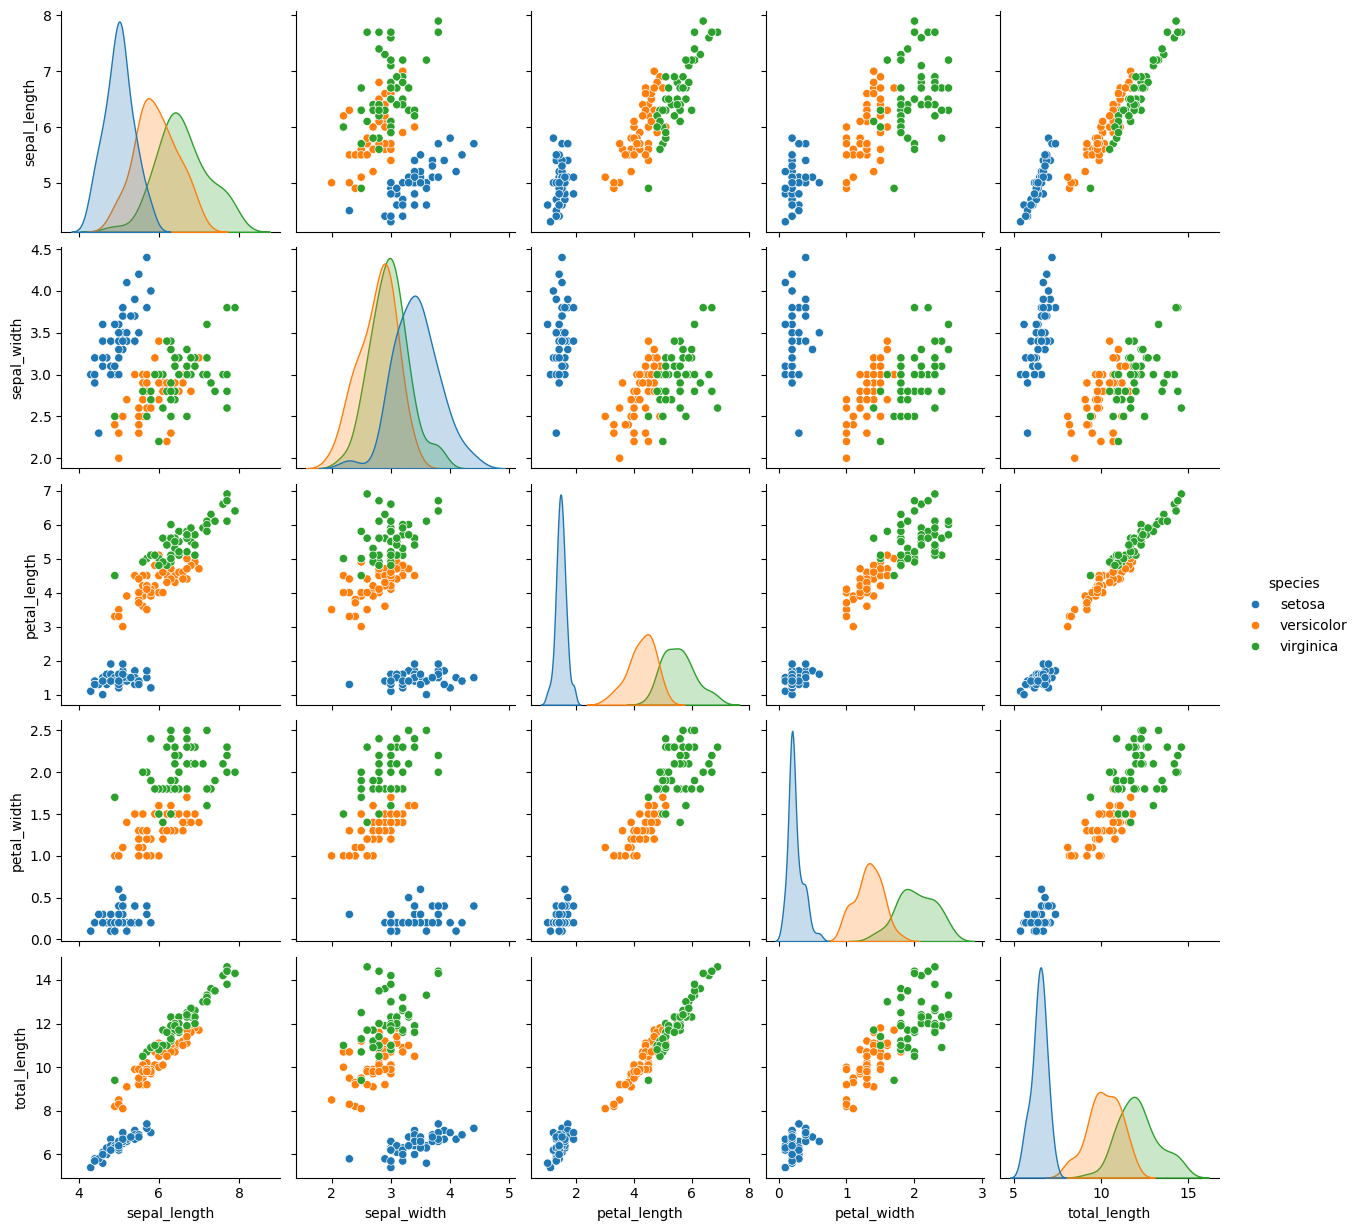

In [18]:
sns.pairplot(df, hue='species')
plt.show()

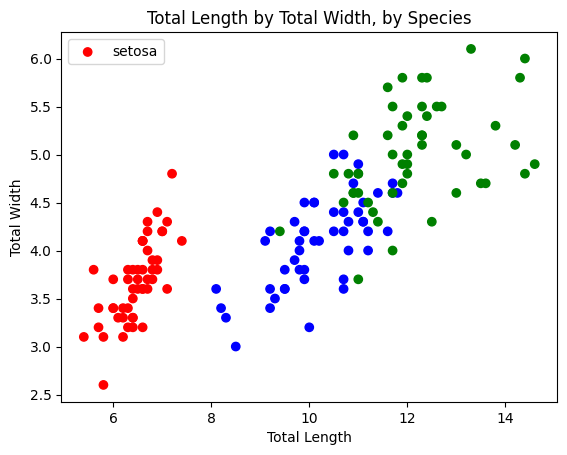

In [24]:
# examine total length and by total width by species using a matplotlib scatter plot
x = df['total_length']
y = df['total_width']
plt.figsize = (15, 5)
plt.scatter(x, y, color=df['species'].map({'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}))
plt.title('Total Length by Total Width, by Species')
plt.xlabel('Total Length')
plt.ylabel('Total Width')
plt.legend(df['species'].unique())
plt.savefig('total_length_by_species.png')
plt.show()



<Axes: xlabel='species', ylabel='total_length'>

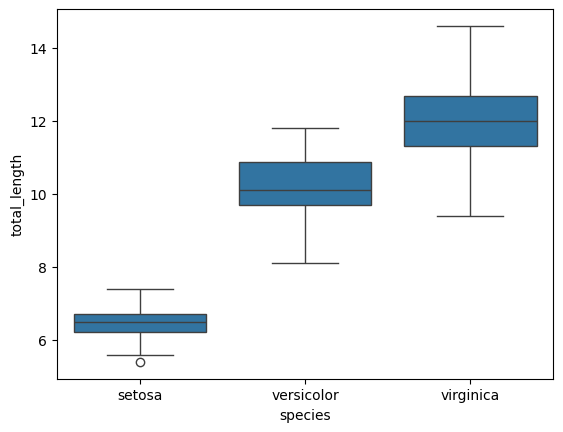

In [25]:
# Now let's do some more advanced plotting with seaborn and matplotlib
# Let's make a boxplot of the total length by species
sns.boxplot(x='species', y='total_length', data=df)